# Lending club case study

**About the Company**

LendingClub is a financial services company headquartered in San Francisco, California. LendingClub enabled borrowers to create unsecured personal loans. The standard loan period was three years. Investors were able to search and browse the loan listings on LendingClub website and select loans that they wanted to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors made money from the interest on these loans. LendingClub made money by charging borrowers an origination fee and investors a service fee.

**Problem statement**

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

input : 
  - loan.csv file which contains the loan history details
  - Data_Dictionary.xlsx which contains the meta data information of loan.csv file


In [1]:
# importing python libraries required for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msgno # for analysing missing values
import seaborn as sb #for visualization

Read the input loan.csv file. This file is assumed to be in  the same folder as of the code
Also, have a quick bird eye view of the contents of the file

/var/folders/dt/9p_fdpvn1lz7gcclv_4_v6780000gp/T/ipykernel_10912/362819839.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('./loan.csv')


<AxesSubplot: >

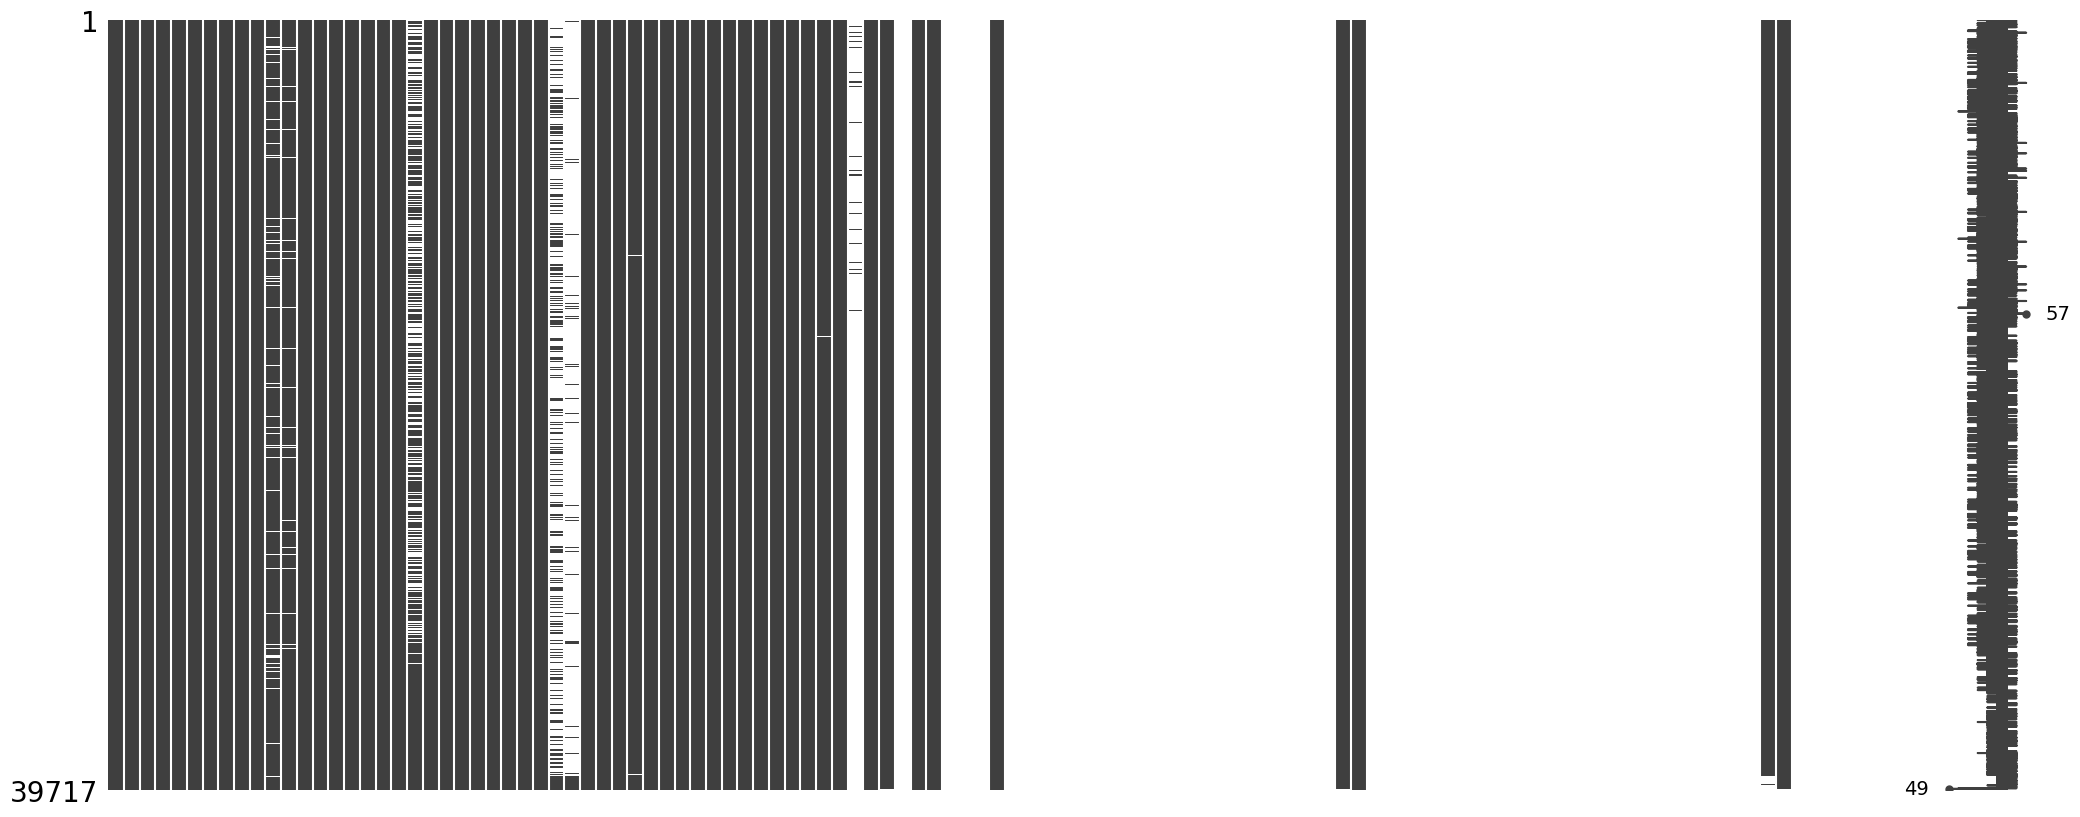

In [2]:
#FILE READ

#read the loan file using pandas library
loan = pd.read_csv('./loan.csv')
#Quick look at the header
loan.head()
#columns with missing values
loan.isnull().sum()
#visualize the missing values in columns
msgno.matrix(loan) 


From the missing value visualization above, its clear that, there are a lot of empty columns and there are missing values in many columns

Start analysing different columns using the info available in data_dictionary.xlsx file & problem statement. Filter data if it does not meet the requirements or haveing no relevance to the problem statement

In [3]:
#get the name of columns with ALL NULL/NA values
emptyCols = loan.columns[loan.isna().all(axis=0)].tolist()
emptyCols


['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [4]:
#remove empty columns since it will not contribute to the data analysis
loan.drop(emptyCols, inplace = True, axis = 1)

In [5]:
#remove columns related to customer behaviour variables since new customers may not have these values at the time of loan application and hence cannot be used for taking decision of loan disbursement
custBehav ={'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'}
loan.drop(custBehav, inplace = True, axis = 1)

Check other columns to check its content and uniqueness of values. And also compare te record count with total record count

In [6]:
loan.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [7]:
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [8]:
loan.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [9]:
loan.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [10]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,14035.000000,2786.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,35.900962,69.698134,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,22.020060,43.822529,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,18.000000,22.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,34.000000,90.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,52.000000,104.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [11]:

#remove columns which are mostly info fields related to loan and has not much relevance for the prediction. Also remove columns with mostly null/same 0 values
otherCols ={'url','desc','emp_title', 'next_pymnt_d', 'chargeoff_within_12_mths','delinq_amnt', 'tax_liens' } 
loan.drop(otherCols, inplace = True, axis = 1)

In [12]:
#cheque for duplicate records based on the 'id' column. As per the dictionary, ID is a unique LC assigned ID.
loan.drop_duplicates(subset=['id'])
#No duplicates found


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,860xx,AZ,27.65,NaN,NaN,f,0.0,1,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,309xx,GA,1.00,NaN,NaN,f,0.0,1,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,606xx,IL,8.72,NaN,NaN,f,0.0,1,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,917xx,CA,20.00,35.0,NaN,f,0.0,1,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,972xx,OR,17.94,38.0,NaN,f,0.0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,802xx,CO,11.33,0.0,0.0,f,NaN,1,0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,274xx,NC,6.40,5.0,0.0,f,NaN,1,0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,017xx,MA,2.30,0.0,0.0,f,NaN,1,0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,208xx,MD,3.72,0.0,0.0,f,NaN,1,0,NaN


In [13]:
#filter records with 'current' as loan status. These records can be omitted since the idea is to predict "Fully Paid" & "Charged Off" cases. Curret once are yet to get any of these statuses
loan.loan_status.value_counts() 

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
loan.drop(loan[loan.loan_status == 'Current'].index, inplace=True)

In [15]:
#have a high level look at the new data set
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,policy_code,acc_now_delinq,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,2740.000000,38521.0,38577.0,38577.0,37880.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,35.882534,69.260949,0.0,1.0,0.0,0.043479
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,22.028093,43.987761,0.0,0.0,0.0,0.204583
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,18.000000,19.750000,0.0,1.0,0.0,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,34.000000,90.000000,0.0,1.0,0.0,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,52.000000,104.000000,0.0,1.0,0.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,0.0,1.0,0.0,2.000000


In [16]:
loan.head

<bound method NDFrame.head of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... zip_code  \
0       36 months   10.65%       162.87     B        B2 

Do more deep dive and inspect each column values. Does required changes in data which helps in analysis. Derive info and add more columns if required

In [17]:
#PREP DATA for analysis
#int_rate column has % attached. remove %. Change the datatype to numeric after that
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['int_rate'] = loan['int_rate'].apply(pd.to_numeric)

#emp_length has special characters like <, >,  +, years etc. use regex (\d+) to extract numbers
loan['emp_length']=loan.emp_length.str.extract('(\d+)') 
loan.emp_length.fillna('0',inplace=True) #there are n/a values in data. get it replaced with 0
loan['emp_length'] = loan['emp_length'].apply(pd.to_numeric) #convert to numeric

#term column has 'months' suffixed to values. remove months. Change the datatype to numeric after that
#loan['term'] = loan['term'].str.rstrip('months')
#loan['term'] = loan['term'].apply(pd.to_numeric)


In [18]:
#inspect all the column data types and make sure its all of required types
loan.dtypes 

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
mths_since_last_delinq        float64
mths_since_last_record        float64
initial_list_status            object
collections_12_mths_ex_med    float64
policy_code 

In [19]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,policy_code,acc_now_delinq,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,2740.000000,38521.0,38577.0,38577.0,37880.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,11.932219,322.466318,4.925526,6.877797e+04,13.272727,35.882534,69.260949,0.0,1.0,0.0,0.043479
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,3.691327,208.639215,3.453921,6.421868e+04,6.673044,22.028093,43.987761,0.0,0.0,0.0,0.204583
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,18.000000,19.750000,0.0,1.0,0.0,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,34.000000,90.000000,0.0,1.0,0.0,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,52.000000,104.000000,0.0,1.0,0.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,120.000000,129.000000,0.0,1.0,0.0,2.000000


Inspect the data again and make sure its all set to start the analysis

<AxesSubplot: >

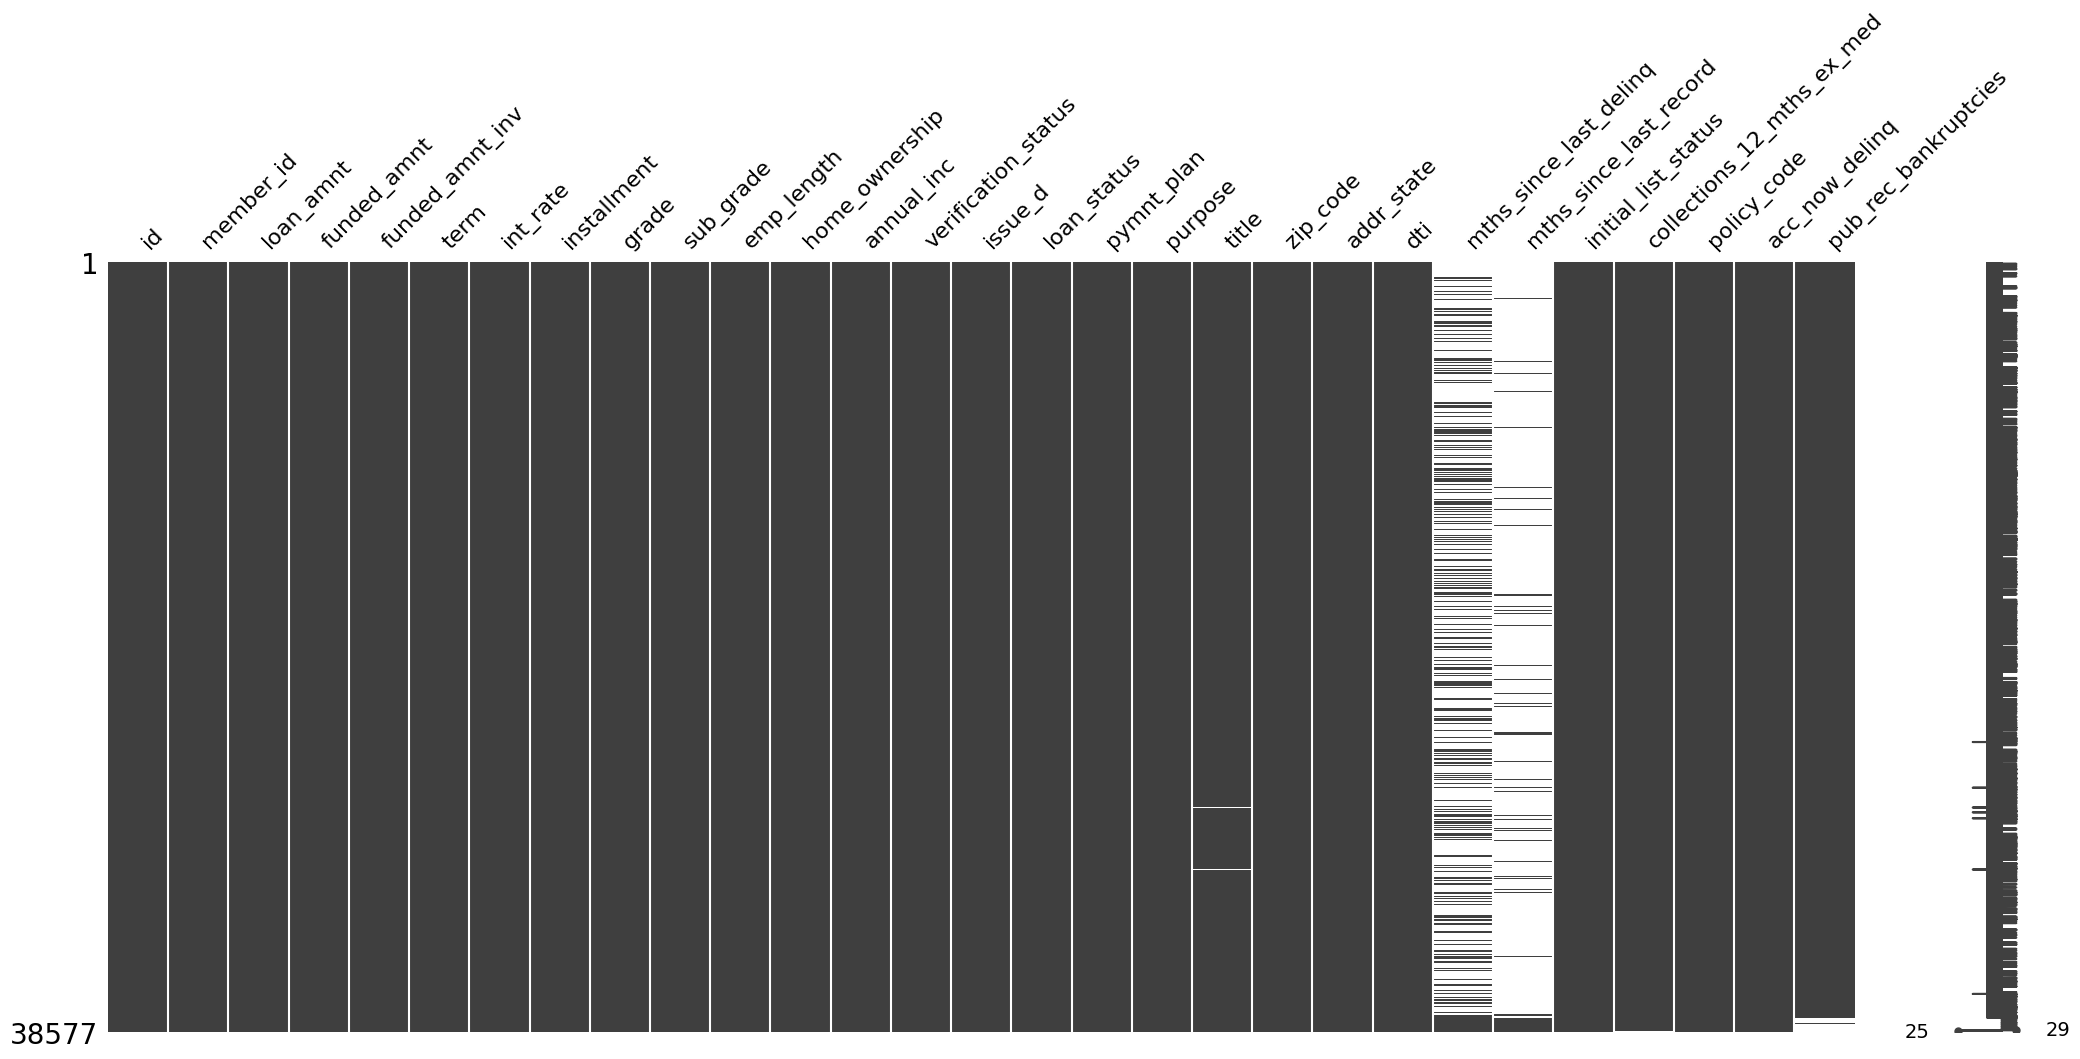

In [20]:
#visualize the missing values in columns
msgno.matrix(loan) 


From the graph above, data looks good and ready for further analysis

After the data preparation, there could be chances that we may drop columns accidently. Do a quick sanity to make sure we have not removed any columns by mistake.

In [21]:
#QA BLOCK
#Before moving to analysing the data, do the basic sanity of data
#test and make sure only the unwanted columns & rows are removed
len(emptyCols) #this should return 54
len(custBehav) #this should return 21, hardcoded values based on manual analysis & knowledge of data
len(otherCols) #this should return 7, hardcoded values based on manual analysis & knowledge of data
#check the latest loan dataframe for columns(initial shape was (39717, 111))
loan.shape # this should return 38577, 29  (38577-1140 = 38577, 111-54-21-7 = 29)



(38577, 29)

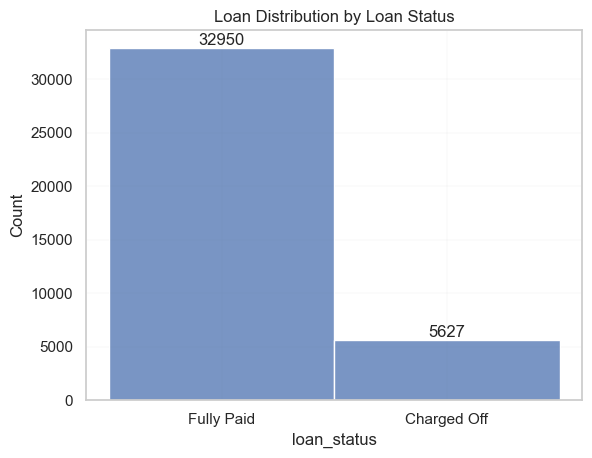

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [43]:
sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
gph = sb.histplot(data=loan.loan_status)
for i in gph.containers:
    gph.bar_label(i,)
gph.set(title="Loan Distribution by Loan Status")
    
plt.show()
loan.loan_status.value_counts()*100/len(loan)

Observations:
- 15% of loans are Charged Off (Out of total FullyPaid & Charged Off)
- this accounts to approx 5500 loans
- Charged Off % percentage is high and needs to be controlled

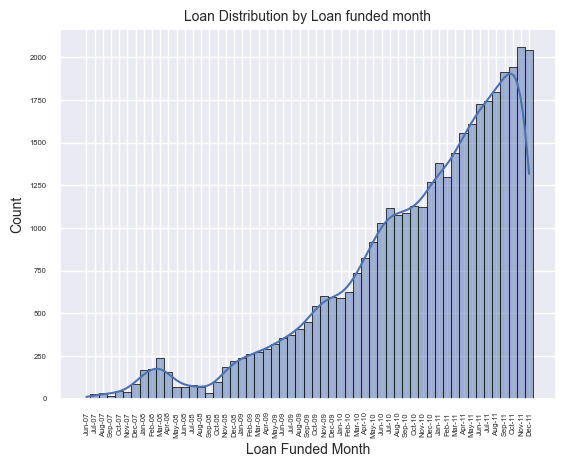

In [24]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = .5)
gph = sb.histplot(loan.issue_d, kde=True, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("Loan Funded Month", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan funded month", fontsize = 10)
plt.gca().invert_xaxis()
plt.show()

Obserations
- Overall, number of loans is showing an increasing trend from September 08(though there are slight dips in between)
- Showing an upward trend in the number of loans is positive sign of progress for business.

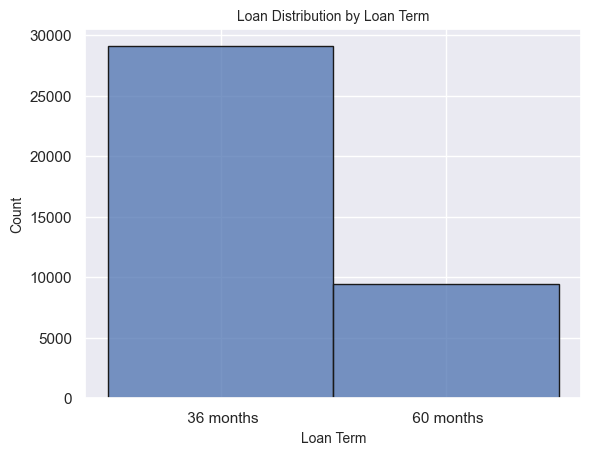

In [25]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = 1)
gph = sb.histplot(loan.term, edgecolor="k")
gph.set_xlabel("Loan Term", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Term", fontsize = 10)
plt.show()


Observations:
- There are more number of loans in the 36 month term than in 60 month. i.e more borrowers prefer shorter term loans
- So company can think of some targeted marketings for lower term category

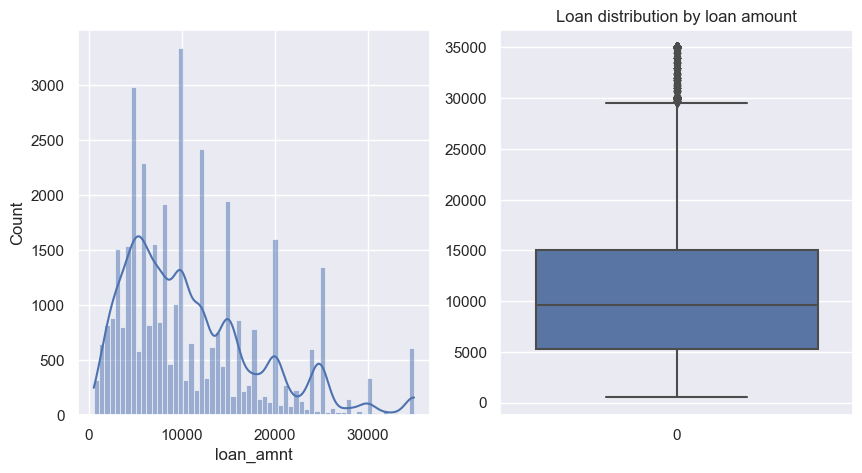

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sb.histplot(data=loan.loan_amnt, kde=True, ax=axs[0])
sb.boxplot(data=loan.loan_amnt, ax=axs[1])
plt.title("Loan distribution by loan amount")
plt.show()
loan.loan_amnt.describe()

Observations:
- loan amount is the amount which the borrower has applied for loan
- most of the loans are applied with loan amount 5300 to 15000
- there are spikes noticed at regular intervals of 5000 (5000, 10000 etc)

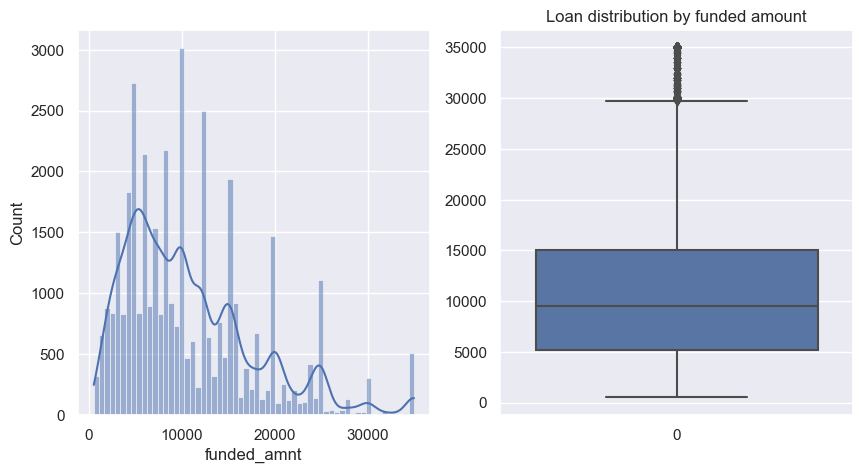

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sb.histplot(data=loan.funded_amnt, kde=True, ax=axs[0])
sb.boxplot(data=loan.funded_amnt, ax=axs[1])
plt.title("Loan distribution by funded amount")
plt.show()
loan.funded_amnt.describe()

Observations

- funded amount is the amount which the lending club has approved for loan

- most of the loans are approved by lending club in the range 5200 to 15000

- there are spikes noticed at regular intervals of mostly 5000 (5000, 10000 etc)

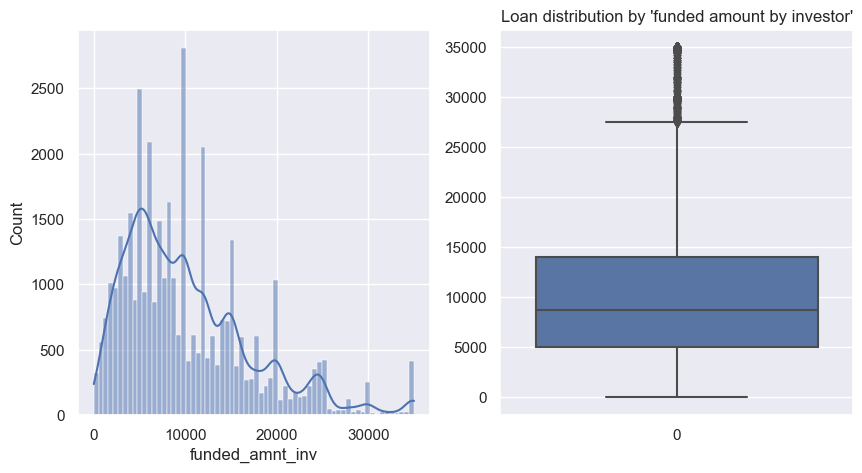

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sb.histplot(data=loan.funded_amnt_inv, kde=True, ax=axs[0])
sb.boxplot(data=loan.funded_amnt_inv, ax=axs[1])
plt.title("Loan distribution by 'funded amount by investor'")
plt.show()
loan.funded_amnt_inv.describe()

Observations

- funded amount inv is the amount which the investor/lender has approved for loan

- most of the amount in the range 5000 to 14000

- there are spikes noticed at regular intervals of mostly 5000 (5000, 10000 etc)

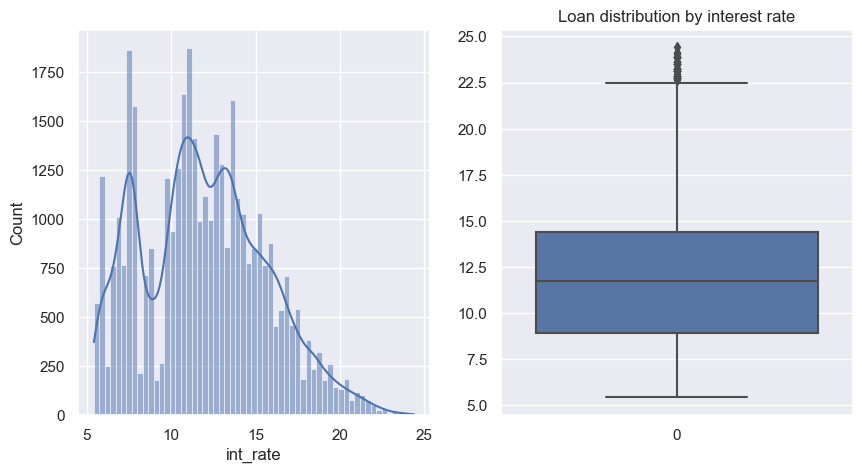

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sb.histplot(data=loan.int_rate, kde=True, ax=axs[0])
sb.boxplot(data=loan.int_rate, ax=axs[1])
plt.title("Loan distribution by interest rate")
plt.show()
loan.int_rate.describe()

Observations:
- most of the loans are given with the interest rate in range 9 to 14.5

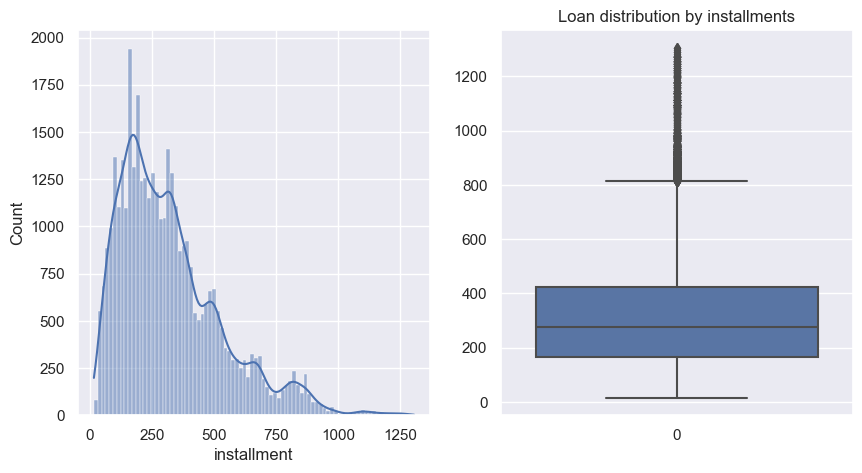

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sb.histplot(data=loan.installment, kde=True, ax=axs[0])
sb.boxplot(data=loan.installment, ax=axs[1])
plt.title("Loan distribution by installments")
plt.show()
loan.installment.describe()

Observation:
- most of the installments are in the range 165 to 425. 
- This range looks bit on a lower number when compared to overall data

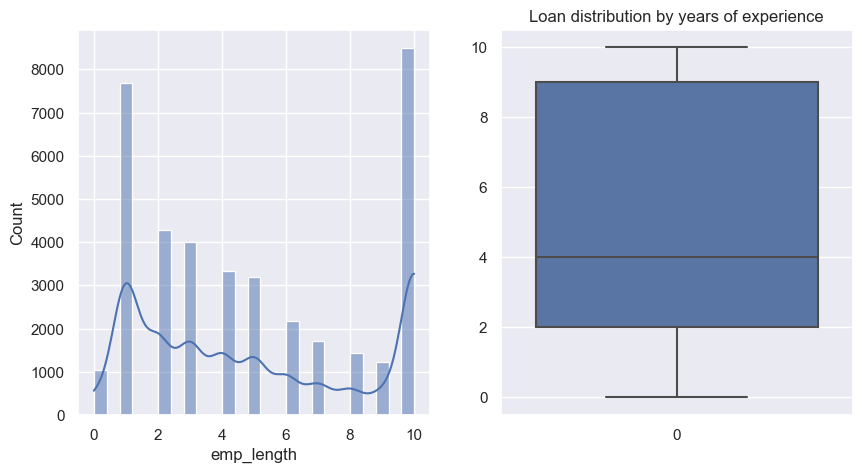

count    38577.000000
mean         4.925526
std          3.453921
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sb.histplot(data=loan.emp_length, kde=True, ax=axs[0])
sb.boxplot(data=loan.emp_length, ax=axs[1])
plt.title("Loan distribution by years of experience")
plt.show()
loan.emp_length.describe()

Observations:
- the lower and upper boundaries of most common experience lies in 2 & 9. This pretty much covers most of the data
- there is a spike seen at 1 yr and 10 yr. i.e at the early carrer stage & towards more experienced stages, more people apply for loan

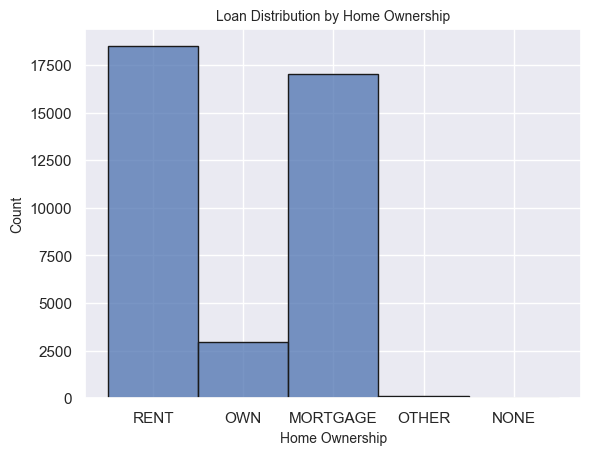

In [32]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = 1)
gph = sb.histplot(loan.home_ownership, edgecolor="k")
gph.set_xlabel("Home Ownership", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Home Ownership", fontsize = 10)
plt.show()

Observations:
- borrowers staying in Rented house or having Mortgage are having considerably more number of loans than others

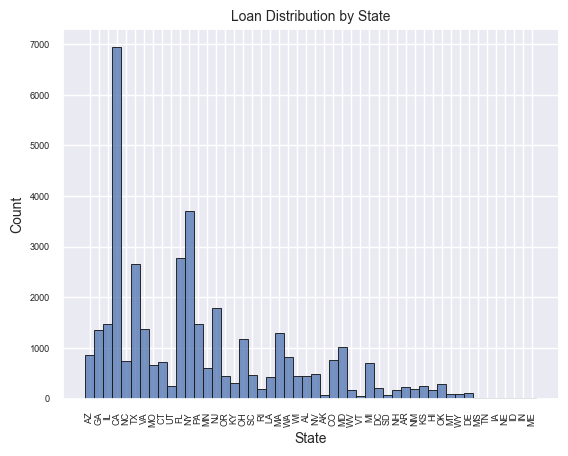

In [40]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = .6)
plt.xticks(rotation=90) 
gph = sb.histplot(loan.addr_state, edgecolor="k")
gph.set_xlabel("State", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by State", fontsize = 10)
plt.show()

Observation
- Most of the loans are given in the state of CA - California

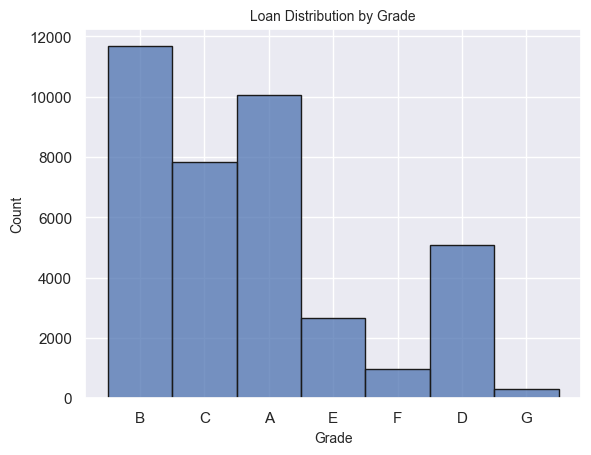

B    30.264147
A    26.038831
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: grade, dtype: float64

In [45]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = 1)
gph = sb.histplot(loan.grade, edgecolor="k")
gph.set_xlabel("Grade", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Grade", fontsize = 10)
plt.show()
loan.grade.value_counts()*100/len(loan)

Observations:
- Grades A, B & C consitutes more than 75% of the loans given. This is a good sign because most number of loans are given in low risk category (ref: https://www.lendingclub.com/foliofn/rateDetail.action)

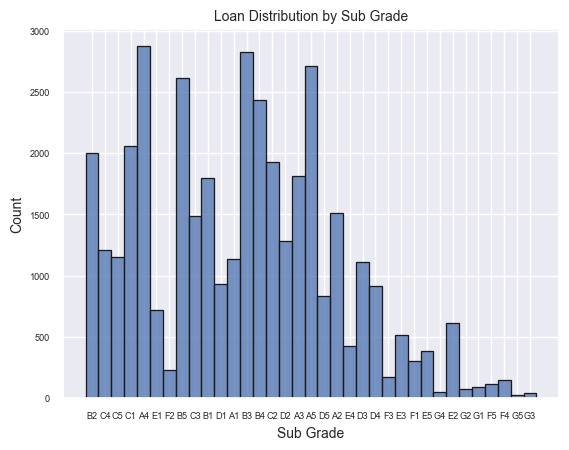

A4    7.447443
B3    7.323016
A5    7.037872
B5    6.778650
B4    6.317236
C1    5.327008
B2    5.187029
C2    5.005573
A3    4.691915
B1    4.658216
A2    3.909065
C3    3.857221
D2    3.333593
C4    3.126215
C5    2.991420
A1    2.952536
D3    2.892915
D1    2.413355
D4    2.379656
D5    2.161910
E1    1.871582
E2    1.591622
E3    1.337585
E4    1.099101
E5    1.003188
F1    0.790627
F2    0.603987
F3    0.451046
F4    0.391425
F5    0.292921
G1    0.243669
G2    0.199601
G4    0.139980
G3    0.116650
G5    0.075174
Name: sub_grade, dtype: float64

In [48]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = .6)
gph = sb.histplot(loan.sub_grade, edgecolor="k")
gph.set_xlabel("Sub Grade", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Sub Grade", fontsize = 10)
plt.show()
loan.sub_grade.value_counts()*100/len(loan)

Observations:
- More number of loans are given in the high risk category of low risk grades (ref: https://www.lendingclub.com/foliofn/rateDetail.action)

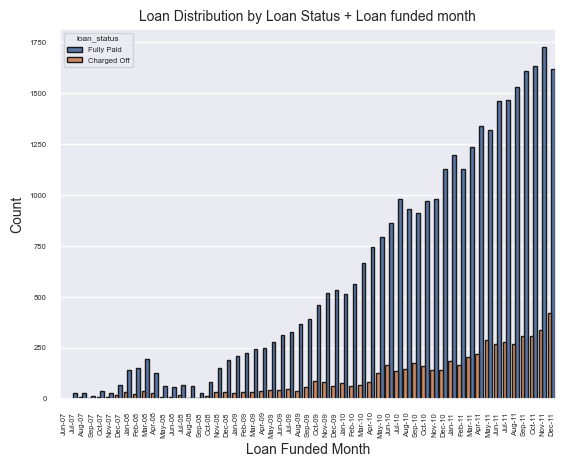

In [57]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = .5)
gph = sb.countplot(x=loan.issue_d, data=loan, hue=loan.loan_status, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("Loan Funded Month", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Status + Loan funded month", fontsize = 10)
plt.gca().invert_xaxis()
plt.show()

Observation:
- The graph shows a similar trend as of total. Total loans increased over months and same with "Fully Paid" & "Charged Off" loans

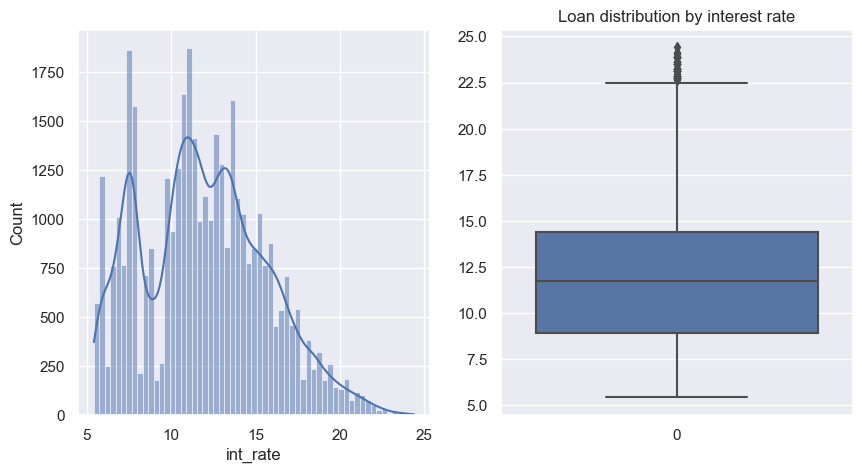

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [98]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
#sb.countplot(x=loan.term, data=loan, hue=loan.loan_status, edgecolor="k")
#sb.boxplot(data=loan.emp_length, ax=axs[1])
#sb.boxplot( data=loan.int_rate, hue=loan.loan_status, ax=axs[1])
#plt.title("Loan distribution by years of experience")
#plt.show()
#fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sb.histplot(data=loan.int_rate, kde=True, ax=axs[0])
sb.boxplot(data=loan.int_rate, ax=axs[1])
plt.title("Loan distribution by interest rate")
plt.show()
loan.int_rate.describe()


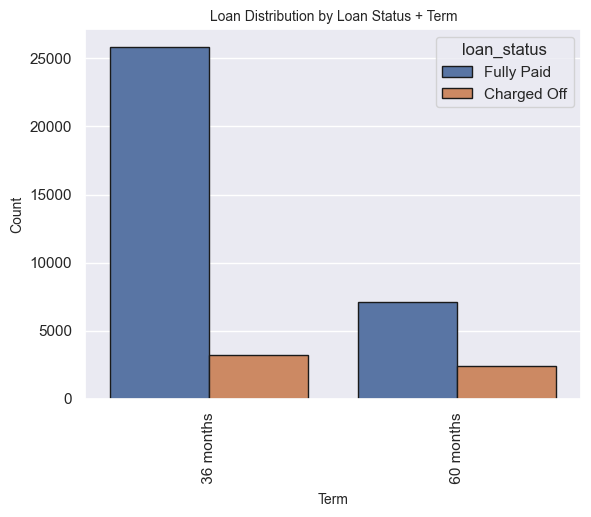

In [65]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = 1)
gph = sb.countplot(x=loan.term, data=loan, hue=loan.loan_status, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("Term", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Status + Term", fontsize = 10)
plt.show()

Observation:
- Though the Charged Off & Fully Paid loans are more for 36 months term, the ratio of Charged Off vs Fully Paid is significantly different for 36 & 60 months.
- Graph shows that the chance of default is very high for 60 month loans

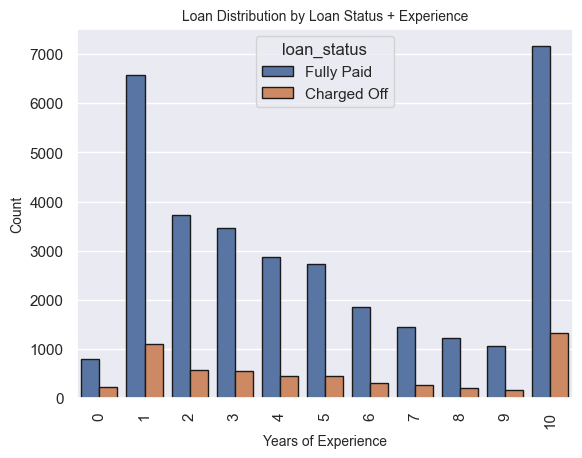

In [66]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = 1)
gph = sb.countplot(x=loan.emp_length, data=loan, hue=loan.loan_status, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("Years of Experience", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Status + Experience", fontsize = 10)
plt.show()

Observation:
- Same observation as of graph plotted with total
- ratio looks same across all categories

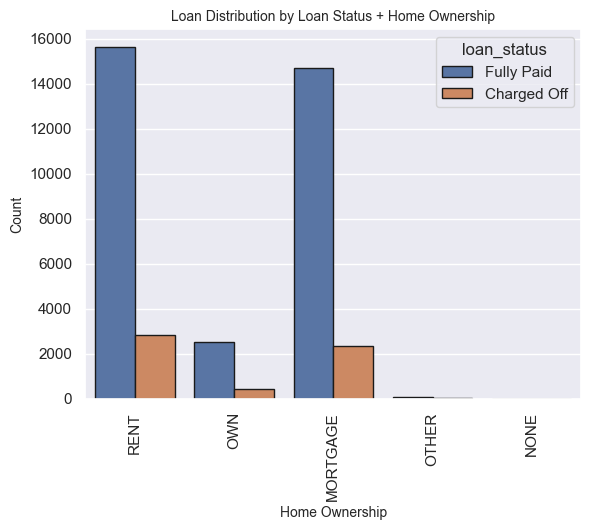

In [67]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = 1)
gph = sb.countplot(x=loan.home_ownership, data=loan, hue=loan.loan_status, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("Home Ownership", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Status + Home Ownership", fontsize = 10)
plt.show()

Observation:
- Same observation as of graph plotted with total
- ratio looks same across all categories

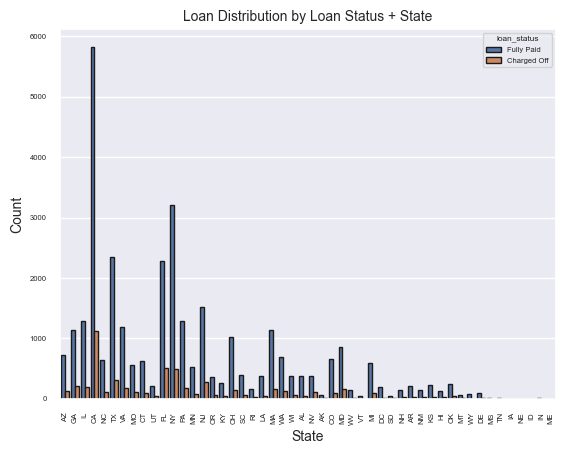

In [69]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = .5)
gph = sb.countplot(x=loan.addr_state, data=loan, hue=loan.loan_status, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("State", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Status + State", fontsize = 10)
plt.show()

Observation:
- Same observation as of graph plotted with total
- ratio looks same across all categories

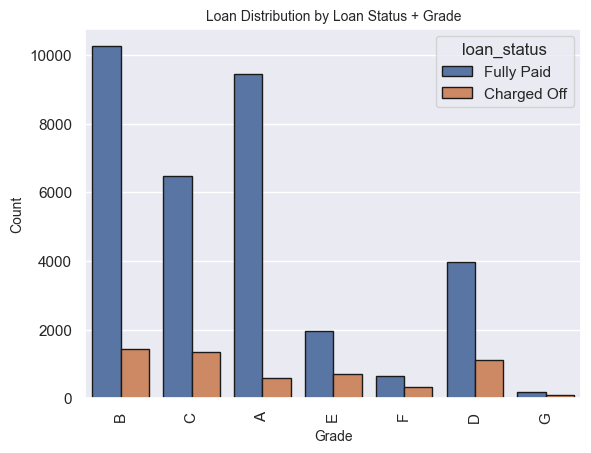

In [71]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = 1)
gph = sb.countplot(x=loan.grade, data=loan, hue=loan.loan_status, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("Grade", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Status + Grade", fontsize = 10)
plt.show()

Observations:
- Ratio of defaulters are very less in grade A, followed by B, C, D, E, F & G(in the increasing order of default ratio)

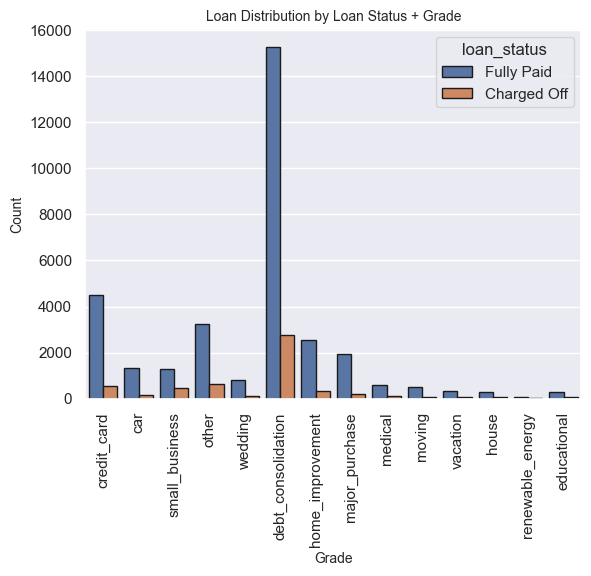

In [73]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sb.set(font_scale = 1)
gph = sb.countplot(x=loan.purpose, data=loan, hue=loan.loan_status, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("Purpose", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Status + Loan Purpose", fontsize = 10)
plt.show()

Observation:
- Debt consolidation has the heighest number of loans and the same with ChargedOff cases. Ratio also looks same across different segments

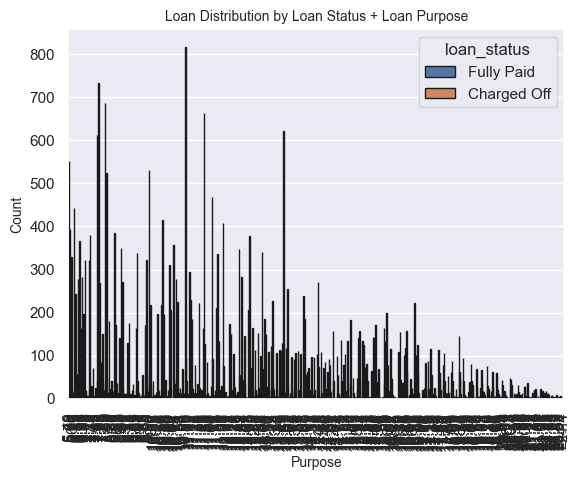

In [77]:
gph = sb.set(style='whitegrid', rc={"grid.linewidth": 10})
sb.set(font_scale = 1)
gph = sb.countplot(x=loan.int_rate, data=loan, hue=loan.loan_status, edgecolor="k")
plt.xticks(rotation=90)  
gph.set_xlabel("Purpose", fontsize = 10)
gph.set_ylabel("Count", fontsize = 10)
gph.set_title("Loan Distribution by Loan Status + Loan Purpose", fontsize = 10)
plt.show()

In [100]:
#understand the corelation
sb.set(font_scale=1.1)
corr = loan.corr()
#sb.clustermap(corr,annot=True,figsize=(12,8))
#plt.show()

/var/folders/dt/9p_fdpvn1lz7gcclv_4_v6780000gp/T/ipykernel_10912/1717876501.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan.corr()
